<a href="https://colab.research.google.com/github/ash-win19/Methods-of-Data-Science/blob/main/Assignment_4_Quiz_K_Nearest_Neighbor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Q1. Total number of people (patients) in the dataset

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

dataframe = pd.read_csv('/content/KNNAlgorithmDataset-1.csv')
patientsCount, featuresCount = dataframe.shape
print(patientsCount)

569


Number of benign and malignant cases

In [27]:
disease_categories = list(dataframe['diagnosis'].unique())

malignant_filter = dataframe['diagnosis'] == disease_categories[0]
benign_filter = dataframe['diagnosis'] == disease_categories[1]

malignant_patients = dataframe[malignant_filter]
benign_patients = dataframe[benign_filter]

num_of_benign_cases = benign_patients.shape[0]
num_of_malignant_cases = malignant_patients.shape[0]

print("Number of benign cases recorded are: ", num_of_benign_cases)
print("Number of malignant cases recorded are: ", num_of_malignant_cases)

Number of benign cases recorded are:  357
Number of malignant cases recorded are:  212


Calculation of number of valid attributes

In [35]:
featuresCount
dataframe.info()
# Line 1 & 2 results in a value: 33
# But the last column is "unnamed"
valid_features = dataframe.drop(columns=['Unnamed: 32']).shape[1] # For fetching column count
valid_features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

32

Q2. Fill in the blanks.

 Determine the K value using the square root method. Enter the K value into your program.
Apply K-Nearest Neighbor.
Use testing and training validation (random sampling), setting the training set to 70% (30% testing set).
Keep data unbalanced.
Do not standardize or normalize the dataset.
Answer the following based on your results.

In [36]:
k_value = int(np.sqrt(patientsCount))
print(k_value)

23


In [79]:
cleaned_dataframe = dataframe.drop(columns=['Unnamed: 32'])
X = cleaned_dataframe.drop(columns=['id', 'diagnosis'])
y = cleaned_dataframe['diagnosis']

# Splitting dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# K-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=k_value)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
misclassifications = (y_test != y_pred).sum()

k_value, int(accuracy), misclassifications

(23, 95, 8)

Q3. Fill in the blanks

Determine the K value using the error plot Enter the K value into your program.
Apply K-Nearest Neighbor.
Use testing and training validation (random sampling), setting the training set to 70% (30% testing set).
Keep data unbalanced.
Do not standardize or normalize the dataset.
Answer the following based on your results.

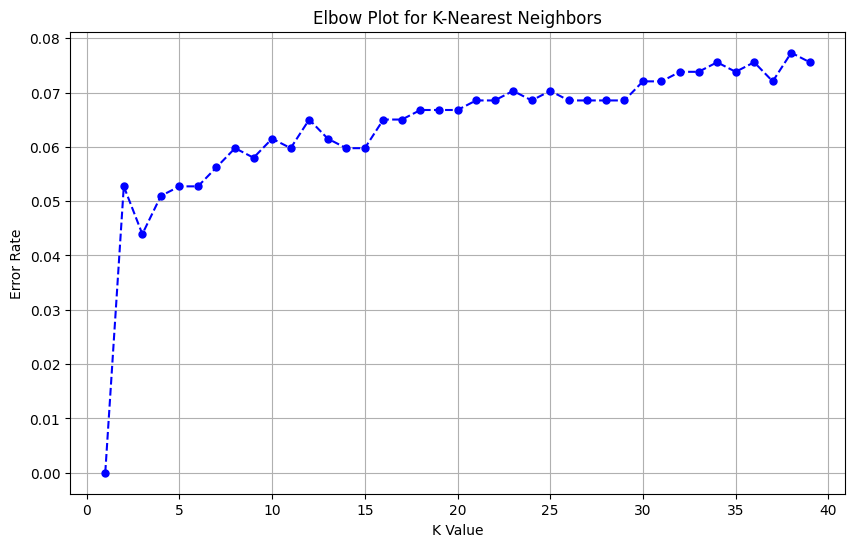

In [72]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


error_rate = []


for k in range(1, 40):

    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the KNN model
    knn.fit(X.drop(columns=['id', 'Unnamed: 32']), y)


    y_pred = knn.predict(X.drop(columns=['id', 'Unnamed: 32']))

    # Calculate the error rate
    error_rate.append(np.mean(y_pred != y))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o', markersize=5)
plt.title('Elbow Plot for K-Nearest Neighbors')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()


In [80]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy: ", accuracy)

Accuracy:  95.32163742690058


In [82]:
misclassifications = (y_test != y_pred).sum()
print("Number of misclassifications:", misclassifications)

Number of misclassifications: 8
